In [1]:
import itertools
import pandas as pd

import simulation, evaluation

# Empirical data

In [2]:
df = pd.read_csv("./data/all-weeks-countries.tsv", sep='\t')
df.week = pd.to_datetime(df.week)
df.loc[:, 'item_title'] = df.apply(lambda x: x.season_title if type(x.season_title)!=float else x.show_title, axis=1)
empirical = df[(df.country_name=="United States") & (df.category=="TV")]
empirical = empirical.drop(columns=['country_iso2', 'category', 'show_title', 'season_title'])
n_weeks = empirical.week.nunique()
n_items = empirical.item_title.nunique()

In [3]:
time_empirical = evaluation.time_on_list(empirical, "item_title", "week")
churn_empirical = evaluation.churn(empirical, "item_title", "week")
transitions_empirical = evaluation.movement_prob(empirical, "item_title", "week", "weekly_rank")

# Test simulation

In [4]:
sim = simulation.Simulation(n_items, 100_000, n_weeks, 0.2, 1)
sim.init_simulation()
sim.run_simulation()

100%|██████████| 36/36 [02:14<00:00,  3.74s/it]


In [5]:
time_sim = evaluation.time_on_list(sim.top_ten, "movie", "iteration")
churn_sim = evaluation.churn(sim.top_ten, "movie", "iteration")
transitions_sim = evaluation.movement_prob(sim.top_ten, "movie", "iteration", "rank")

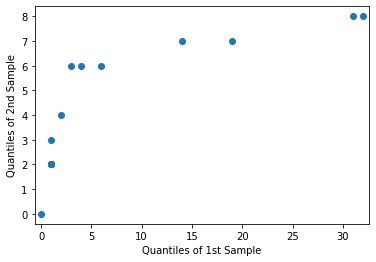

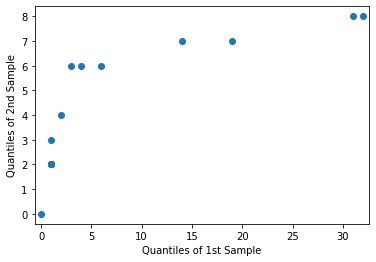

In [6]:
evaluation.compare_distributions(time_empirical, time_sim)

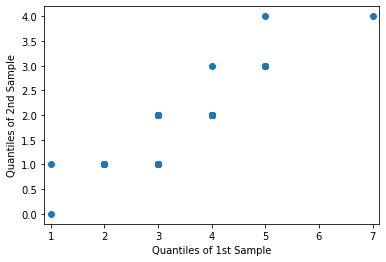

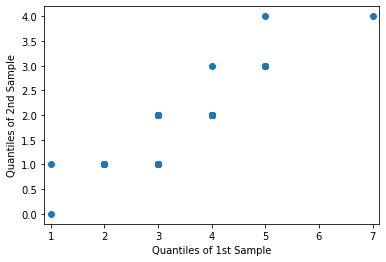

In [7]:
evaluation.compare_distributions(churn_empirical, churn_sim)

In [8]:
evaluation.compare_distributions(transitions_empirical, transitions_sim)

0.18987951281611312

# Simulation param sweep

In [14]:
pop_params = [0.2, 0.5, 0.8]
pl_params = [1, 1.5, 2]
param_sweep = list(itertools.product(pop_params, pl_params))

In [15]:
results = []
for pair in param_sweep:
    pop = pair[0]
    pl = pair[1]
    sim = simulation.Simulation(300, 100_000, 12, pop, pl)
    sim.init_simulation()
    sim.run_simulation()
    mean_churn = sim._calculate_churn(sim.top_ten)
    results.append({'pop': pop, 'pl': pl, 'churn': mean_churn})    

100%|██████████| 12/12 [01:15<00:00,  6.31s/it]


In [16]:
results

[{'pop': 0.2, 'pl': 1, 'churn': 3.3636363636363638},
 {'pop': 0.2, 'pl': 1.5, 'churn': 2.4545454545454546},
 {'pop': 0.2, 'pl': 2, 'churn': 1.9090909090909092},
 {'pop': 0.5, 'pl': 1, 'churn': 3.727272727272727},
 {'pop': 0.5, 'pl': 1.5, 'churn': 3.5454545454545454},
 {'pop': 0.5, 'pl': 2, 'churn': 3.272727272727273},
 {'pop': 0.8, 'pl': 1, 'churn': 4.818181818181818},
 {'pop': 0.8, 'pl': 1.5, 'churn': 6.0},
 {'pop': 0.8, 'pl': 2, 'churn': 5.454545454545454}]

In [3]:
sim = simulation.Simulation(300, 100_000, 12, 0.8, 2)

In [4]:
sim.init_simulation()

In [5]:
sim.run_simulation()

100%|██████████| 12/12 [01:13<00:00,  6.15s/it]


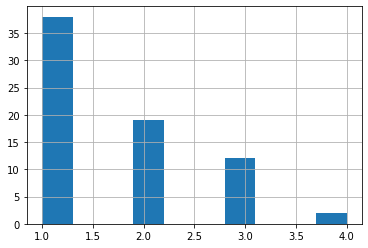

In [8]:
cumulative_weeks = sim.top_ten.groupby('movie').nunique()['iteration'].hist()


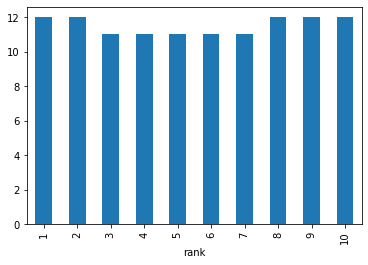

In [9]:
rank_occupants = sim.top_ten.groupby('rank').nunique()['movie'].plot(kind='bar')

In [12]:
mean_churn = sim._calculate_churn(sim.top_ten)
mean_churn

5.818181818181818

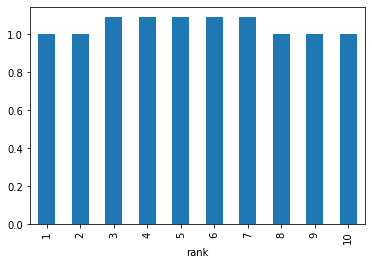

In [13]:
rank_stickiness = sim.top_ten.groupby(['movie', 'rank']).count().groupby(level=1).mean().iteration.plot(kind='bar')